In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, analysis as ana
from scipy.signal import savgol_filter
from matplotlib.pyplot import *

In [2]:
def plots(mb,fltr='cinv',ytype='nilc',mtype=0,dtype='dr2_smica',cmask='Lmask',form='{:.2f}'):

    BH = ['normal','lens','lens-src']
    s = mb.bc**2/2/np.pi
    p = prjlib.init_analysis(dtype=dtype,fltr=fltr,wtype=cmask)
    
    qobj = {}
    qobj['normal'], __, __, qobj['lens'], qobj['lens-src'] = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
    
    cy = tools_y.init_compy(p.ids,masktype=mtype,ytype=ytype,ascale=1.0)
    
    pl.plot_1dstyle(fsize=[10,3],ymin=-1e-8,ymax=1e-8,ylab=r'$L^2C_L^{\tau y}/2\pi$')
    
    for bh in BH:
        al = (np.loadtxt(qobj[bh].f['TT'].al)).T[1]
        yy = savgol_filter( (np.loadtxt(cy.fclyy)).T[1], 51, 3)
        vl = np.sqrt(al*yy)/np.sqrt(qobj[bh].l+1e-30)
        fx = tools_y.init_cross(qobj[bh],cy,p.ids,p.stag)
        mcb, vcb, scb, ocb = bn.binned_spec(mb,fx.xl,cn=1,opt=True,vl=vl)
        errorbar(mb.bc,s*ocb,yerr=s*vcb,fmt='o',label=bh)
    
    axhline(0.,color='k',ls='--')
    
    st = ana.PTEs(ocb,scb,comment=ytype+','+str(mtype),x1pte=True)
    
    figtext(.2,.20,'ymap:'+ytype+','+str(mtype))
    figtext(.2,.25,'tau:'+dtype+','+str(cmask))
    figtext(.2,.30,r'$\chi$-PTE:'+str(form.format(st.px1)))
    figtext(.2,.35,r'$\chi^2$-PTE:'+str(form.format(st.px2)))
    legend()
    show()

In [3]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)

chi: -2.5 , chi (sim): -0.0 , PTE: 0.44 (nilc,0)
chi^2: 16.0 , chi^2 (sim): 11.1 , PTE: 0.18 (nilc,0)


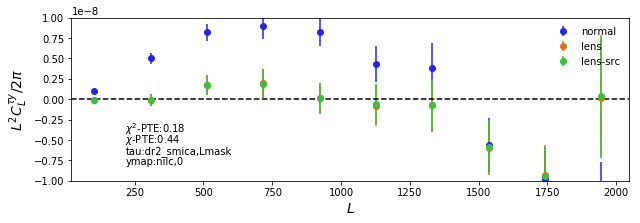

chi: -1.3 , chi (sim): -0.0 , PTE: 0.60 (nilc,0)
chi^2: 13.5 , chi^2 (sim): 11.2 , PTE: 0.27 (nilc,0)


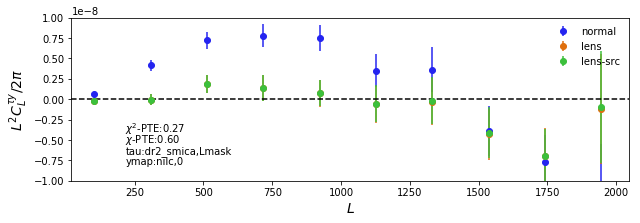

chi: -4.6 , chi (sim): -0.0 , PTE: 0.12 (milca,0)
chi^2: 15.0 , chi^2 (sim): 11.2 , PTE: 0.24 (milca,0)


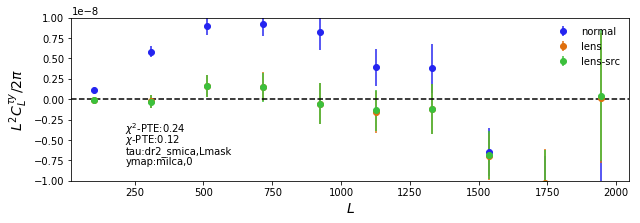

chi: -3.7 , chi (sim): -0.0 , PTE: 0.22 (nilc,1)
chi^2: 7.6 , chi^2 (sim): 11.1 , PTE: 0.75 (nilc,1)


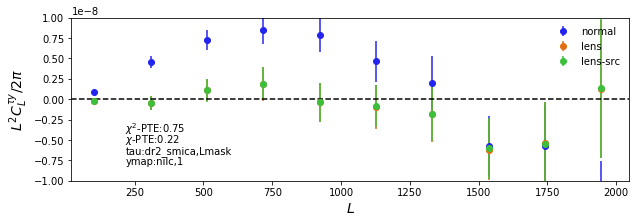

chi: 1.1 , chi (sim): -0.0 , PTE: 0.70 (nilc,0)
chi^2: 9.1 , chi^2 (sim): 11.2 , PTE: 0.58 (nilc,0)


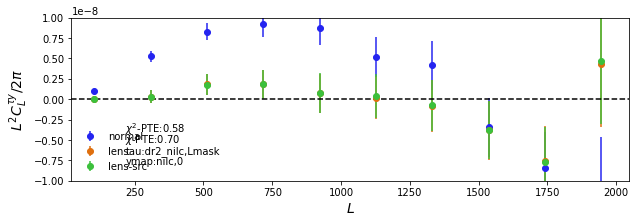

chi: -2.3 , chi (sim): -0.0 , PTE: 0.40 (nilc,0)
chi^2: 11.3 , chi^2 (sim): 11.1 , PTE: 0.41 (nilc,0)


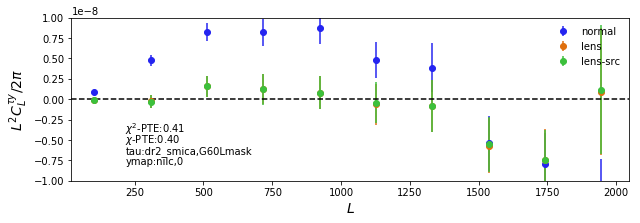

chi: 1.6 , chi (sim): -0.0 , PTE: 0.54 (nilc,0)
chi^2: 14.9 , chi^2 (sim): 11.1 , PTE: 0.22 (nilc,0)


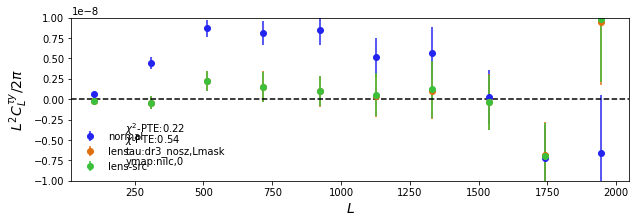

In [4]:
plots(mb)
plots(mb,fltr='none')
plots(mb,ytype='milca')
plots(mb,mtype=1)
plots(mb,dtype='dr2_nilc')
plots(mb,cmask='G60Lmask')
plots(mb,dtype='dr3_nosz',fltr='none')

chi: 0.5 , chi (sim): -0.0 , PTE: 0.84 (nilc,0)
chi^2: 11.1 , chi^2 (sim): 11.2 , PTE: 0.41 (nilc,0)


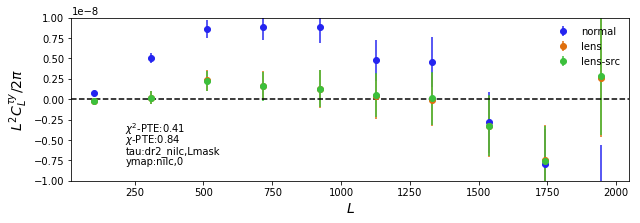

chi: -1.1 , chi (sim): -0.0 , PTE: 0.82 (nilc,1)
chi^2: 7.2 , chi^2 (sim): 11.1 , PTE: 0.83 (nilc,1)


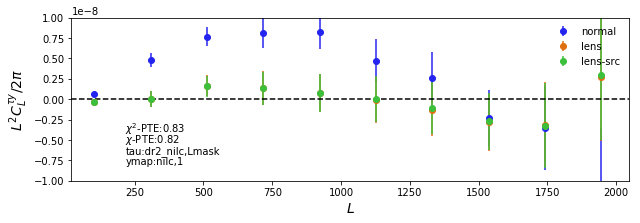

chi: -1.4 , chi (sim): -0.0 , PTE: 0.70 (milca,0)
chi^2: 10.8 , chi^2 (sim): 11.2 , PTE: 0.45 (milca,0)


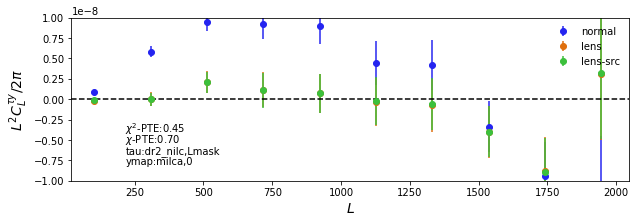

chi: -2.2 , chi (sim): -0.0 , PTE: 0.50 (milca,1)
chi^2: 5.6 , chi^2 (sim): 11.1 , PTE: 0.92 (milca,1)


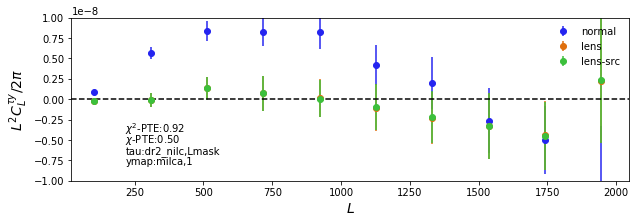

chi: 1.1 , chi (sim): -0.0 , PTE: 0.70 (nilc,0)
chi^2: 9.1 , chi^2 (sim): 11.2 , PTE: 0.58 (nilc,0)


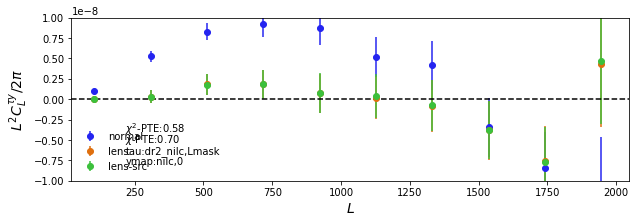

chi: -0.0 , chi (sim): -0.0 , PTE: 0.98 (nilc,1)
chi^2: 3.3 , chi^2 (sim): 11.1 , PTE: 1.00 (nilc,1)


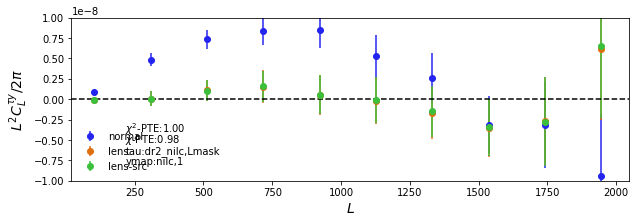

chi: -0.8 , chi (sim): -0.0 , PTE: 0.86 (milca,0)
chi^2: 10.6 , chi^2 (sim): 11.2 , PTE: 0.42 (milca,0)


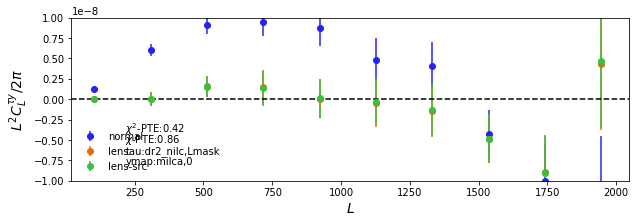

chi: -1.2 , chi (sim): -0.0 , PTE: 0.84 (milca,1)
chi^2: 5.0 , chi^2 (sim): 11.2 , PTE: 0.91 (milca,1)


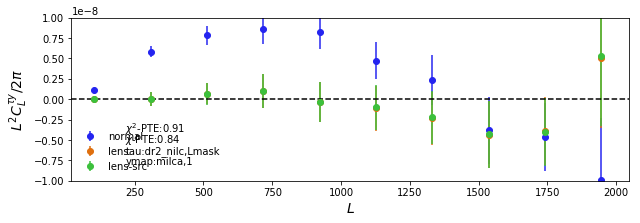

In [8]:
for fltr in ['none','cinv']:
#for fltr in ['none']:
    for dtype in ['dr2_nilc']:
        for cmask in ['Lmask']:
            for ytype in ['nilc','milca']:
                for mtype in [0,1]:
                    plots(mb,fltr,ytype,mtype,dtype,cmask)

In [11]:
def errors(fltr,ytype,mtype,mb,dtype,cmask):
    p = prjlib.init_analysis(dtype=dtype,fltr=fltr,wtype=cmask)
    __, __, __, __, qtBH = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
    cy = tools_y.init_compy(p.ids,masktype=mtype,ytype=ytype,ascale=1.0)
    al = (np.loadtxt(qtBH.f['TT'].al)).T[1]
    yy = savgol_filter( (np.loadtxt(cy.fclyy)).T[1], 51, 3)
    vl = np.sqrt(al*yy)/np.sqrt(qtBH.l+1e-30)
    fxtBH = tools_y.init_cross(qtBH,cy,p.ids,p.stag)
    __, vcb, scb = bn.binned_spec(mb,fxtBH.xl,cn=1,doreal=False,opt=True,vl=vl)
    return vcb, scb

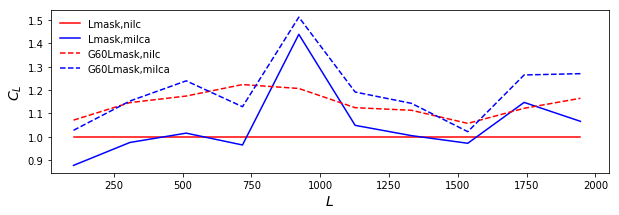

In [14]:
vcb, scb = errors('none','nilc',0,mb,'dr2_smica','Lmask')
pl.plot_1dstyle()
for dtype in ['dr2_smica']:
    for cmask, ls in [('Lmask','-'),('G60Lmask','--')]:
        for ytype, co in [('nilc','r'),('milca','b')]:
            vcb2, __ = errors('none',ytype,0,mb,dtype,cmask)
            plot(mb.bc,vcb2/vcb,ls=ls,color=co,label=cmask+','+ytype)
legend()